# GreyAtom Hackathon - Travel Insurance (Will they Claim it?)

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data. 
As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.


In [1]:
# Load Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

C:\Users\shweta\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\shweta\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Inspect the Data

In [3]:
# Load the training data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# Look at the shape of the data. There are 11 variables and 52,310 rows. 
print(train.shape)
print(train.info())

(52310, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB
None


In [5]:
# Change the datatype of the Target Variable
train['Claim'] = train['Claim'].astype('category')

In [6]:
train.head(4)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0


# EXPLORATORY DATA ANALYSIS

In [7]:
# Lets check for the missing values in both the data sets.
print('The Null Values in Training Dataset are')
print(train.isnull().sum())
print('')
print('The Null Values in Testing Dataset are')
print(test.isnull().sum())

The Null Values in Training Dataset are
ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

The Null Values in Testing Dataset are
ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64


We can see that there are no null values in both the data sets.

In [8]:
# We can remove the ID column as it does not add value
# Drop from the Training dataset
train.drop(['ID'], axis=1, inplace=True)
# Drop from the Training dataset
test.drop(['ID'], axis=1, inplace=True)
print('The shape of the training dataset is',train.shape)
print('The shape of the testing dataset is', test.shape)

The shape of the training dataset is (52310, 10)
The shape of the testing dataset is (22421, 9)


In [9]:
# Rename the commission variable
train.rename(columns = {'Commision (in value)':'Commission'}, inplace = True)
test.rename(columns={'Commision (in value)':'Commission'}, inplace = True)

In [10]:
print('Summary Statistics of Variables')
train.describe(include='all')

Summary Statistics of Variables


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
count,52310,52310,52310,52310,52310.000000,52310,52310.000000,52310.000000,52310.000000,52310.0
unique,16,2,2,25,NaN,97,NaN,NaN,NaN,2.0
top,EPX,Travel Agency,Online,Cancellation Plan,NaN,SINGAPORE,NaN,NaN,NaN,0.0
freq,26218,34996,51419,13254,NaN,14242,NaN,NaN,NaN,43590.0
mean,NaN,NaN,NaN,NaN,58.256108,NaN,48.554673,12.219963,39.555725,NaN
std,NaN,NaN,NaN,NaN,109.138708,NaN,60.198589,22.847645,13.762473,NaN
min,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,10.000000,NaN,19.800000,0.000000,33.000000,NaN
50%,NaN,NaN,NaN,NaN,24.000000,NaN,29.500000,0.000000,36.000000,NaN
75%,NaN,NaN,NaN,NaN,57.000000,NaN,55.000000,13.380000,43.000000,NaN


Following observations can be made from the above table.
- For categorical variables like Agency, Agency Type, Distribution Channel , Product Name, there is one dominant category
- Duration of travel has negative values, which is not possible
- Net Sales also has negative values, which is not possible
- Age has a maximum value of 118. A person as old as 118 cannot travel. 
- Standard Deviation of Duration is high, indicating presence of outliers.

In [11]:
num_col=['Duration','Net Sales','Commission', 'Age']
cat_col=['Agency','Agency Type','Distribution Channel','Product Name','Destination']

# Univariate and Bivariate Analysis

Variable 1 - Agency

In [12]:
print('The value counts for the Agency variable are')
train['Agency'].value_counts()

The value counts for the Agency variable are


EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: Agency, dtype: int64

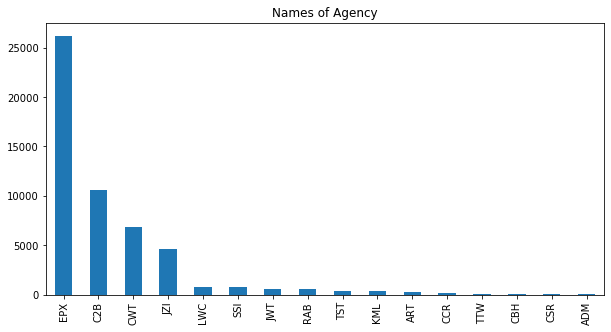

In [13]:
plt.figure(figsize=(10,5))
train['Agency'].value_counts().plot(kind='bar', title='Names of Agency')
plt.show()

Agency EPX is the largest agency for the insurer, followed by C2B, CWT and JZI. All others have negligible business with the insurer

In [14]:
# Lets check for the break up of Agency by Claims

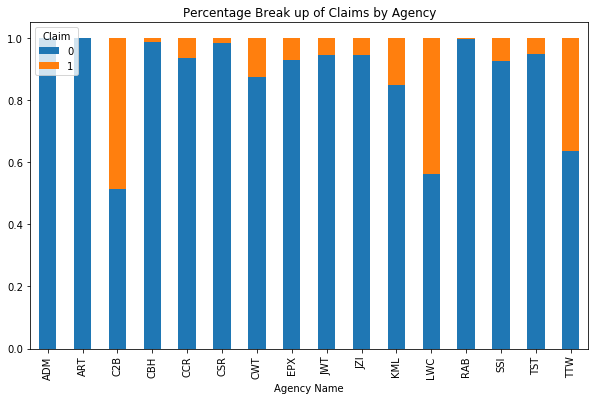

In [15]:
agency_breakup = train.groupby('Agency')['Claim'].value_counts(normalize=True).unstack()
agency_breakup.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Percentage Break up of Claims by Agency')
plt.xlabel('Agency Name')
plt.show()

Agencies of C2B, LWC, TTW have customers with higher claims as compared to other agencies. The largest agency EPX has customers with very few claims

Lets check for the relationship between Agency and the dependent variable 'Claims' using Chi Square Test of Independence

In [16]:
# Check for the significance of the relationship between the Agency and Claim Status using Chi Square Test
crosstab = pd.crosstab(train['Agency'], train['Claim'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('The p value is', p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Agency and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Agency and Claim Status are significantly independent')


The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Agency and Claim Status are significantly independent


Variable 2 : Agency Type

In [17]:
print('The value counts of Agency Type are')
train['Agency Type'].value_counts()

The value counts of Agency Type are


Travel Agency    34996
Airlines         17314
Name: Agency Type, dtype: int64

Travel Agency constitutes 67% of the overall Agency Type

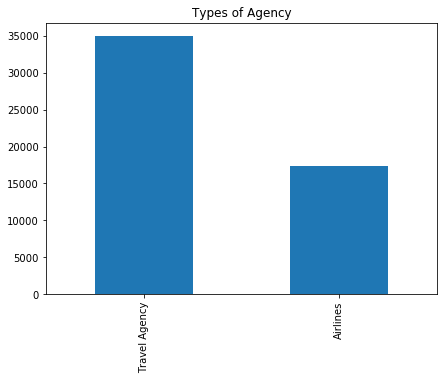

In [18]:
plt.figure(figsize=(7,5))
train['Agency Type'].value_counts().plot(kind='bar', title='Types of Agency')
plt.show()

Lets look at the break up of Agency Type by Claims

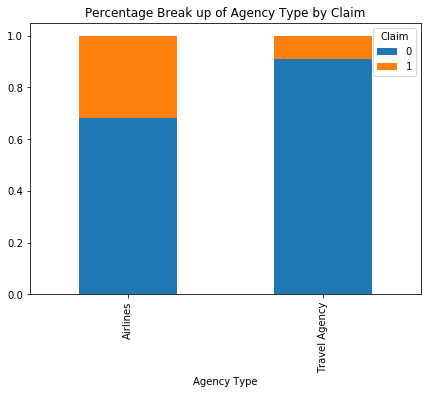

In [19]:
agency_type_breakup = train.groupby('Agency Type')['Claim'].value_counts(normalize=True).unstack()
agency_type_breakup.plot(kind='bar', stacked=True, figsize=(7,5))
plt.xlabel('Agency Type')
plt.title('Percentage Break up of Agency Type by Claim')
plt.show()

We can observe from the graph that even though Travel Agency constitutes higher percentage of Agency Type, claims are higher for Airlines

Lets check for the relationship between Agency Type and the dependent variable 'Claims' using Chi Square Test of Independence

In [20]:
crosstab = pd.crosstab(train['Agency Type'], train['Claim'])
chi2,p, dof,expected = stats.chi2_contingency(crosstab)
print('The p value is', p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Agency Type and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Agency Type and Claim Status are significantly independent')


The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Agency Type and Claim Status are significantly independent


Variable 3: Distribution Channel

In [21]:
print('The value counts for Distribution Channel are')
train['Distribution Channel'].value_counts()

The value counts for Distribution Channel are


Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

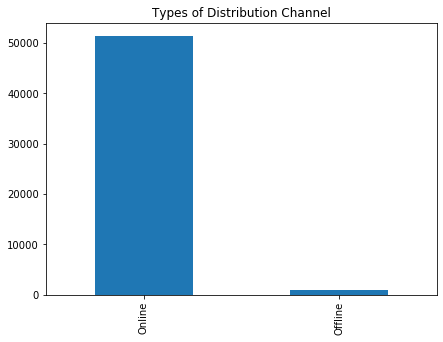

In [22]:
plt.figure(figsize=(7,5))
train['Distribution Channel'].value_counts().plot(kind='bar', title=('Types of Distribution Channel'))

Text(0.5, 0, 'Distribution Channel')

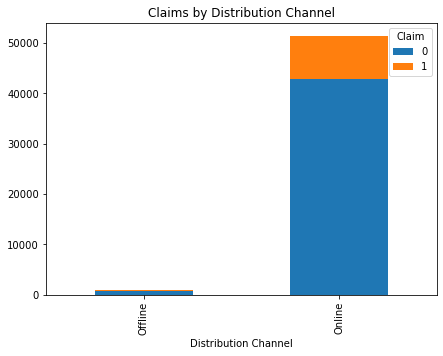

In [23]:
# Break up of Distribution Channels by claims
DC =train.groupby('Distribution Channel')['Claim'].value_counts().unstack()
DC.plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Claims by Distribution Channel')
plt.xlabel('Distribution Channel')

Online Channel constitutes the largest distribution channel for the insurer and also has a higher proportion of positive claims

Lets check for the relationship between Distribution and the dependent variable 'Claims' using Chi Square Test of Independence

In [24]:
crosstab = pd.crosstab(train['Distribution Channel'], train['Claim'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('The p value is', p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Distribution and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Distribution and Claim Status are significantly independent')


The p value is 0.0027497083841443296
Given the p value of 0.0027497083841443296 we reject the Null Hypothesis that variables Distribution and Claim Status are significantly independent


Variable 4: Product Name

In [25]:
print('The different Products and their Counts are')
train['Product Name'].value_counts()

The different Products and their Counts are


Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan                       2348
Value Plan                               1961
Ticket Protector                          780
Travel Cruise Protect                     394
Gold Plan                                 380
Annual Gold Plan                          295
Comprehensive Plan                        278
Single Trip Travel Protect Gold           251
Annual Travel Protect Gold                183
24 Protect                                165
Premier Plan                              141
Single Trip Travel Protect Silver         130
Single Trip Travel Protect Platinum       100
Annual Travel Protect Silver               92
Individual Comprehensive Plan     

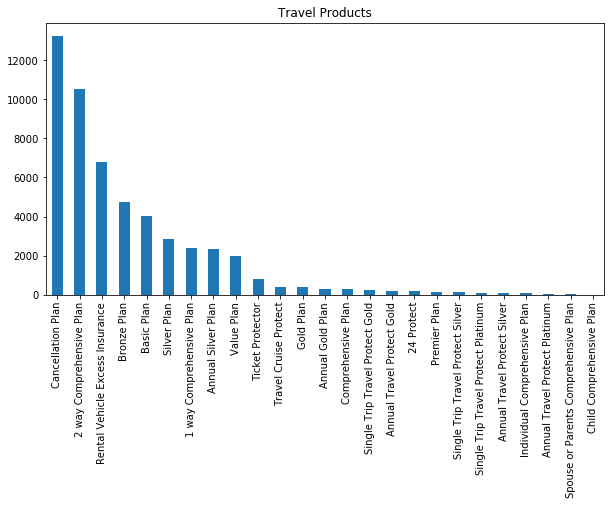

In [26]:
plt.figure(figsize=(10,5))
train['Product Name'].value_counts().plot(kind='bar', title='Travel Products')
plt.show()

Text(0.5, 1.0, '% Break up of Claims by Products')

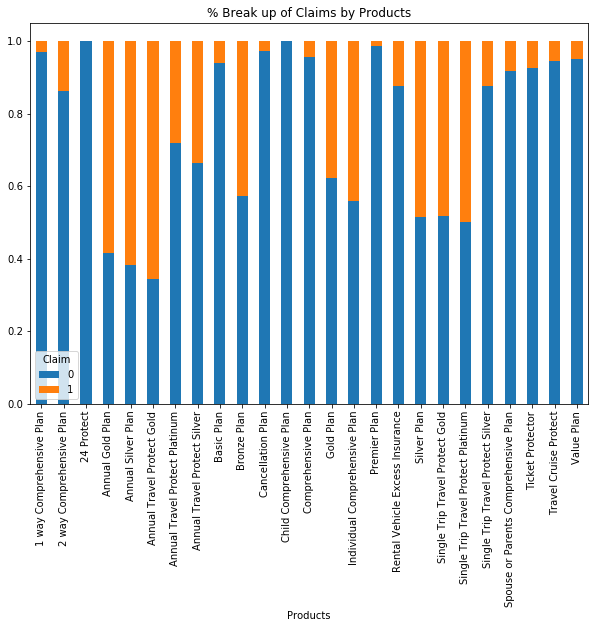

In [27]:
# Percentage Break up Products by Claims
PNC = train.groupby('Product Name')['Claim'].value_counts(normalize = True).unstack()
PNC.plot(kind='bar', stacked = True, figsize=(10,7))
plt.xlabel('Products')
plt.title('% Break up of Claims by Products')



The most popular travel plans do not have higher claims. Products like Gold Plan, Silver Plan, Bronze Plan have higher claims.
We can infer that these plans would be more expensive and hence not purchased much by customers

Lets check for the relationship between Product Name and the dependent variable 'Claims' using Chi Square Test of Independence

In [28]:
# Lets check for the significance of the Product name variable
crosstab = pd.crosstab(train['Product Name'], train['Claim'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('The p value is', p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent')


The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent


Variable 5: Duration

In [29]:
train['Duration'].describe()

count    52310.000000
mean        58.256108
std        109.138708
min         -2.000000
25%         10.000000
50%         24.000000
75%         57.000000
max       4881.000000
Name: Duration, dtype: float64

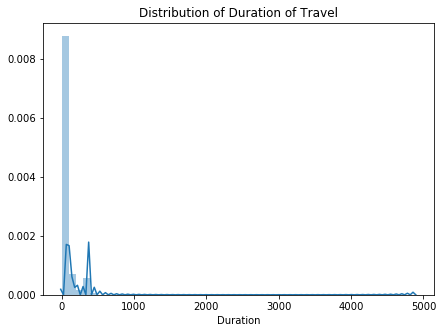

In [30]:
plt.figure(figsize=(7,5))
plt.title('Distribution of Duration of Travel')
sns.distplot(train['Duration'])
plt.show()

We can see that the variable, Duration, is highly skewed. We will need to transform this variable in the preprocessing section.

Also there are negative values which need to be removed. lets check how many and where are the negative values for this variable

In [31]:
train[train['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
11523,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


These are also the rows where the Age is 118. We can go ahead and delete these rows.

In [32]:
train.drop(train[train['Duration']<0].index, inplace=True)
print(train.shape)

(52306, 10)


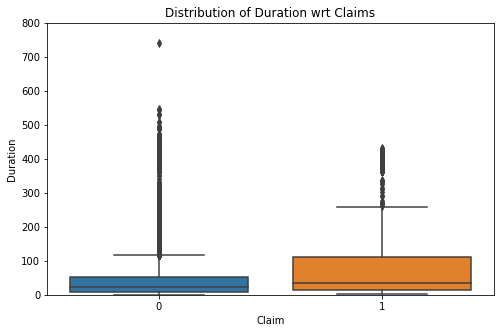

In [33]:
# Plot a boxplot to see the distribution of the Duration variable wrt Claims
plt.figure(figsize=(8,5))
plt.title('Distribution of Duration wrt Claims')
plt.ylim(0,800)
sns.boxplot(x = 'Claim', y='Duration', data=train)

Duration of positive claims is higher than the non positive claims

Lets check for the relationship between Duration and the dependent variable 'Claims' using T tests

In [34]:
D0 = train[train['Claim']==0]['Duration'].values.tolist()
D1 = train[train['Claim']==1]['Duration'].values.tolist()
stat,p = ttest_ind(D0,D1)
print('The p value for Duration is',p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent')

The p value for Duration is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Product Name and Claim Status are significantly independent


In [35]:
# Plot the boxplot to check the outliers in the column
#plt.figure(figsize=(10,10))
#plt.title('Distribution of Duration')
#ax1 = sns.boxplot(x= train['Duration'], data= train )
#train[train['Duration']>4000]
##There are number of observations with outlier value beyond 4500.We will keep these values for now. There are 9 observations for which the value of Duration is > 4000

## We will apply log transformation to the Duration variable as it is rightly skewed. Also as certain values are 0, we will 
# add a constant i.e.1 to it before using log
#print(train['Duration'].head(5))
#train['Duration'] = train['Duration'] + 1
#print(train['Duration'].head(5))
#train['Duration'] = np.log(train['Duration'])
#print(train['Duration'].head(5))
#plt.figure(figsize=(10,10))
#sns.distplot(train['Duration'], hist=False)

Variable 6 : Destination

In [36]:
print('The top 50 Destinations are')
train['Destination'].value_counts().head(50)

The top 50 Destinations are


SINGAPORE                           14242
THAILAND                             4562
MALAYSIA                             4358
CHINA                                3909
AUSTRALIA                            3011
INDONESIA                            2515
UNITED STATES                        2196
PHILIPPINES                          1797
HONG KONG                            1775
JAPAN                                1611
INDIA                                1596
VIET NAM                             1205
KOREA, REPUBLIC OF                   1152
UNITED KINGDOM                       1044
TAIWAN, PROVINCE OF CHINA             824
MYANMAR                               591
BRUNEI DARUSSALAM                     564
ITALY                                 408
CANADA                                393
NEW ZEALAND                           384
CAMBODIA                              360
FRANCE                                334
GERMANY                               324
NETHERLANDS                       

In [37]:
print('The total number of Destinations are',train['Destination'].nunique())

The total number of Destinations are 97


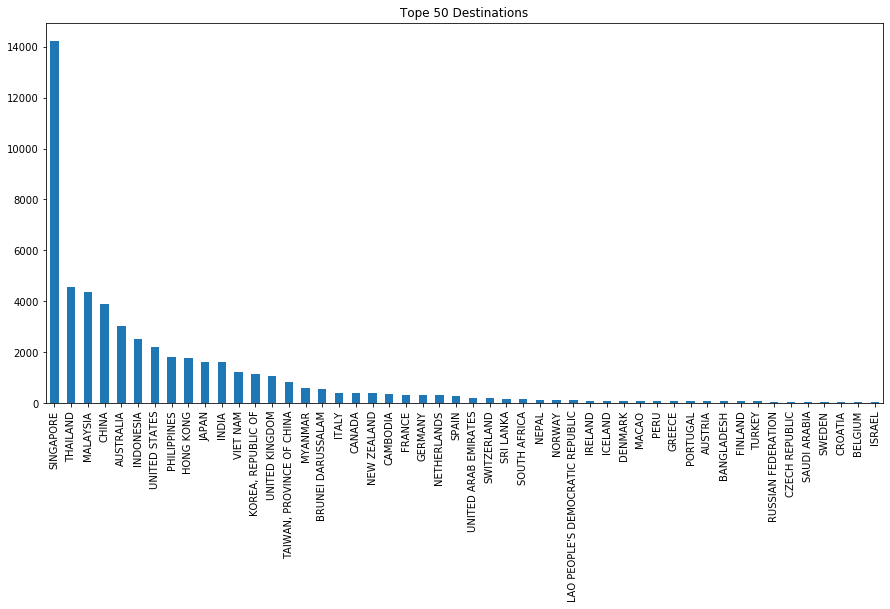

In [38]:
plt.figure(figsize=(15,7))
train['Destination'].value_counts().head(50).plot(kind='bar', title='Tope 50 Destinations')
plt.show()

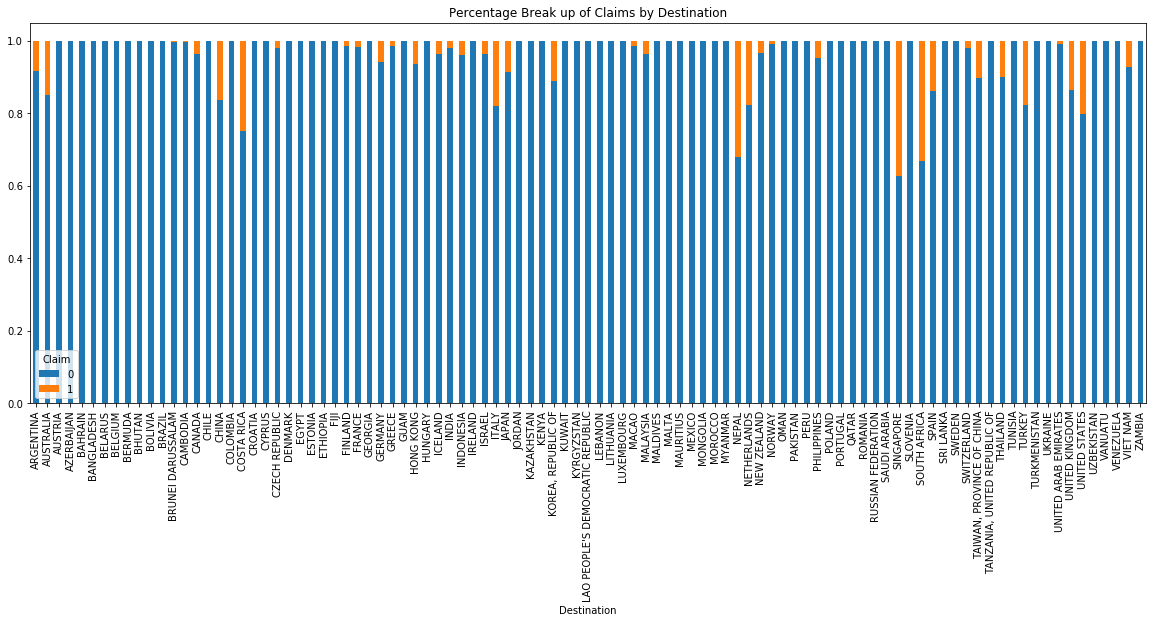

In [39]:
# Analyse the variable Destination wrt Claims
Destinationby_Claims = train.groupby('Destination')['Claim'].value_counts(normalize=True).unstack()
Destinationby_Claims.plot(kind='bar', stacked=True, figsize=(20,7), title='Percentage Break up of Claims by Destination')
plt.show()

Countries like Singapore, South Africa, Nepal have higher proportion of positive claims

Lets check for the relationship between Destination and the dependent variable 'Claims' using Chi Square Test of Independence

In [40]:
crosstab = pd.crosstab(train['Destination'], train['Claim'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print('The p value is', p)
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Destination and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Destination and Claim Status are significantly independent')


The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Destination and Claim Status are significantly independent


Variable 7: Age

In [41]:
train['Age'].describe()

count    52306.000000
mean        39.549727
std         13.745891
min          0.000000
25%         33.000000
50%         36.000000
75%         43.000000
max        118.000000
Name: Age, dtype: float64

Max value of Age is 118. Lets check the number of values for Age greater than 100

In [42]:
train[train['Age']>100].shape[0]

733

In [43]:
train.shape[0]

52306

What percentage of this is made up of rows that have Age greater than 100

In [44]:
733/52306

0.014013688678163118

If we go ahead and delete this data, only 1.4% of the data will be removed. We will go ahead and remove these rows.

In [45]:
train.drop(train[train['Age']>100].index, inplace=True)

In [46]:
train.shape[0]

51573

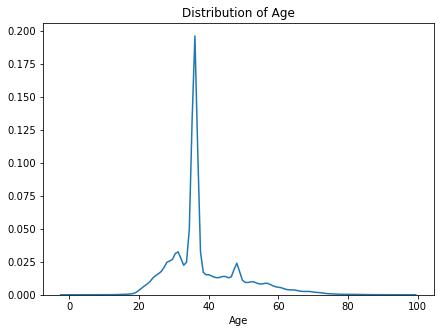

In [47]:
# lets look at the Distribution of Age now after removing the outliers
plt.figure(figsize=(7,5))
plt.xlabel('Age')
plt.title('Distribution of Age')
sns.distplot(train['Age'], hist=False)
plt.show()

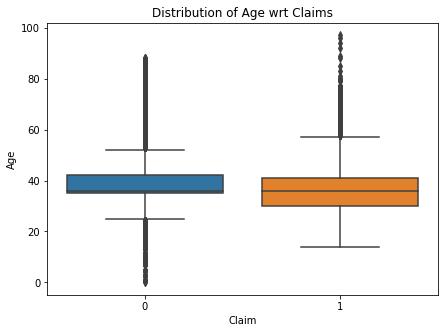

In [48]:
# lets look at the distribution of Age wrt Claims
plt.figure(figsize=(7,5))
plt.title('Distribution of Age wrt Claims')
ax = sns.boxplot(x = 'Claim', y='Age', data=train)

Age for positive claims is more positively skewed while Age for Negative claims is skewed on both sides
Distribution of Age for positive claims is wider than the distribution of Age for negative claims

Lets check for the relationship between Age and the dependent variable 'Claims' using T tests

In [49]:
# Lets check for the significance of the Age variable
A0 = train[train['Claim']==0]['Age'].values.tolist()
A1 = train[train['Claim']==1]['Age'].values.tolist()
stats, p = ttest_ind(A0,A1)
print('The p value is', str(p))
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Age and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Age and Claim Status are significantly independent')

The p value is 6.308676128705656e-43
Given the p value of 6.308676128705656e-43 we reject the Null Hypothesis that variables Age and Claim Status are significantly independent


Variable 8: Net Sales

In [50]:
train['Net Sales'].describe()

count    51573.000000
mean        48.541944
std         60.448170
min       -389.000000
25%         19.800000
50%         29.000000
75%         55.000000
max        682.000000
Name: Net Sales, dtype: float64

In [51]:
train['Net Sales'].head()

0    12.0
1    17.0
2    19.8
3    27.0
4    37.0
Name: Net Sales, dtype: float64

In [52]:
train[train['Net Sales']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
104,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81,UNITED KINGDOM,-128.7,77.22,63,0
147,EPX,Travel Agency,Online,Cancellation Plan,15,CANADA,-17.0,0.00,24,0
190,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,178,AUSTRALIA,-69.3,41.58,29,0
485,C2B,Airlines,Online,Annual Silver Plan,364,SINGAPORE,-389.0,97.25,27,0
587,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,31,JAPAN,-69.3,41.58,26,0
...,...,...,...,...,...,...,...,...,...,...
52023,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,FRANCE,-29.7,17.82,26,0
52119,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,193,ITALY,-277.2,166.32,65,0
52154,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,196,AUSTRALIA,-69.3,41.58,66,0
52163,EPX,Travel Agency,Online,Cancellation Plan,18,JAPAN,-45.0,0.00,54,0


At a policy level, net sales cannot be negative. We should consider removing these rows. 

In [53]:
train.shape[0]

51573

In [54]:
train.drop(train[train['Net Sales']<0].index, inplace=True)

In [55]:
train.shape[0]

51079

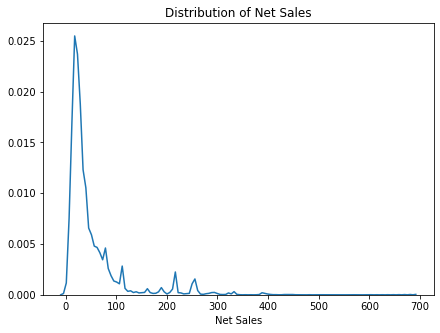

In [56]:
# lets look at the Distribution of Net Sales now after removing the negative values
plt.figure(figsize=(7,5))
plt.xlabel('Age')
plt.title('Distribution of Net Sales')
sns.distplot(train['Net Sales'], hist=False)
plt.show()

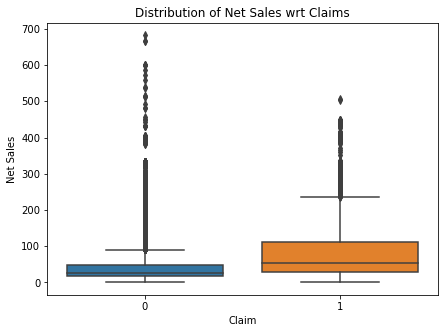

In [57]:
# lets look at the distribution of Net Sales wrt Claims
plt.figure(figsize=(7,5))
plt.title('Distribution of Net Sales wrt Claims')
ax = sns.boxplot(x = 'Claim', y='Net Sales', data=train)

Lets check for the relationship between Net Sales and the dependent variable 'Claims' using T tests

In [58]:
# Lets check for the significance of the Net Sales variable
A0 = train[train['Claim']==0]['Net Sales'].values.tolist()
A1 = train[train['Claim']==1]['Net Sales'].values.tolist()
stats, p = ttest_ind(A0,A1)
print('The p value is', str(p))
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Net Sales and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Net Sales and Claim Status are significantly independent')

The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Net Sales and Claim Status are significantly independent


Variable 9: Commissions

In [59]:
train['Commission'].describe()

count    51079.000000
mean        12.015410
std         22.855017
min          0.000000
25%          0.000000
50%          0.000000
75%         12.851546
max        262.760000
Name: Commission, dtype: float64

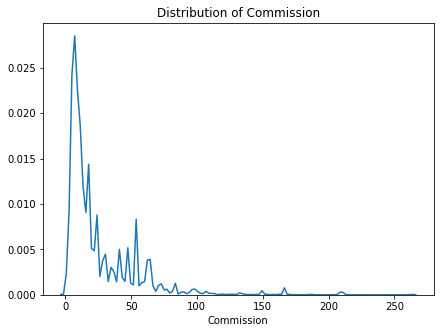

In [60]:
# lets look at the Distribution of Commission 
plt.figure(figsize=(7,5))
plt.xlabel('Age')
plt.title('Distribution of Commission')
sns.distplot(train['Commission'], hist=False)
plt.show()

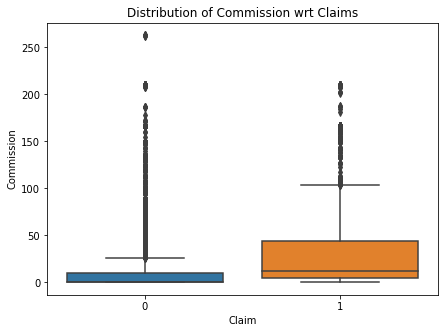

In [61]:
# lets look at the distribution of Commission wrt Claims
plt.figure(figsize=(7,5))
plt.title('Distribution of Commission wrt Claims')
ax = sns.boxplot(x = 'Claim', y='Commission', data=train)

Lets check for the relationship between Commission and the dependent variable 'Claims' using T tests

In [62]:
# Lets check for the significance of the Commission variable
A0 = train[train['Claim']==0]['Commission'].values.tolist()
A1 = train[train['Claim']==1]['Commission'].values.tolist()
stats, p = ttest_ind(A0,A1)
print('The p value is', str(p))
if (p < 0.05):
    print('Given the p value of', p, 'we reject the Null Hypothesis that variables Commission and Claim Status are significantly independent')
else:
    print('Given the p value of', p, 'we fail to reject the Null Hypothesis that variables Commission and Claim Status are significantly independent')

The p value is 0.0
Given the p value of 0.0 we reject the Null Hypothesis that variables Commission and Claim Status are significantly independent


Variable 10 : Claims

In [63]:
train['Claim'].value_counts()

0    42444
1     8635
Name: Claim, dtype: int64

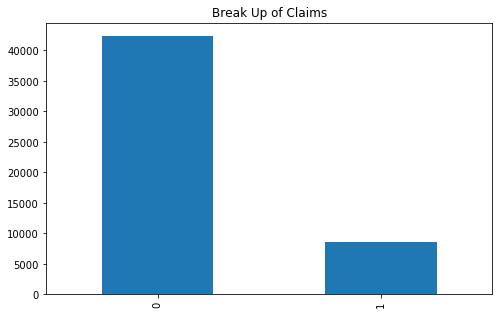

In [64]:
plt.figure(figsize=(8,5))
train['Claim'].value_counts().plot(kind='bar', title='Break Up of Claims')
plt.show()

# Check for Correlations

In [65]:
num_col=['Duration','Net Sales','Commission', 'Age']
cat_col=['Agency','Agency Type','Distribution Channel','Product Name','Destination']

In [66]:
cor = train[num_col].corr()

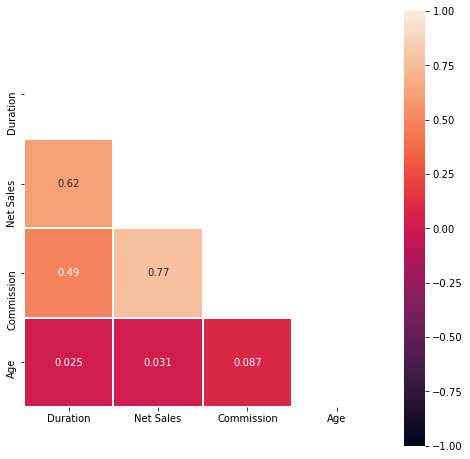

In [67]:
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor, mask=mask, ax=ax,vmin=-1, vmax=1, annot=True,square= True, linewidths=1)

None of the correlation values are too high. We will retain all the variables for now.

# Outlier Detection

In [68]:
for col in num_col:
    q75,q25 = np.percentile(train.loc[:,col],[75,25])
    iqr = q75-q25
    minn = q25 - (1.5*iqr)
    maxx = q75 + (1.5*iqr)
    print('*'*50)
    print('Column Name:', col)
    print('Minimum Value :', minn)
    print('Maximum Value:', maxx)
    print('Outliers in variable', col,'are', (train.loc[train.loc[:,col]<minn,col].count() + train.loc[train.loc[:,col]>maxx,col].count()))

**************************************************
Column Name: Duration
Minimum Value : -60.5
Maximum Value: 127.5
Outliers in variable Duration are 5374
**************************************************
Column Name: Net Sales
Minimum Value : -34.0
Maximum Value: 110.0
Outliers in variable Net Sales are 4749
**************************************************
Column Name: Commission
Minimum Value : -19.277318711937355
Maximum Value: 32.128864519895586
Outliers in variable Commission are 6239
**************************************************
Column Name: Age
Minimum Value : 19.5
Maximum Value: 55.5
Outliers in variable Age are 4260


There is considerable skew in the data . We will account for the skewness in the next section.

# Feature Engineering

We will create additional features for Product and Destination. 

In [69]:
train['Singapore'] = np.where(train['Destination']=='Singapore', 1, 0)
train['Cancellation Plan'] = np.where(train['Product Name']=='Cancellation Plan', 1, 0)
train['2 way Comprehensive Plan'] = np.where(train['Product Name']=='2 way Comprehensive Plan', 1, 0)
train['EPX'] = np.where(train['Agency']=='EPX', 1, 0)

In [70]:
train['Singapore'] = train['Singapore'].astype('object')
train['Cancellation Plan'] = train['Cancellation Plan'].astype('object')
train['2 way Comprehensive Plan'] = train['2 way Comprehensive Plan'].astype('object')
train['EPX'] = train['EPX'].astype('object')

In [76]:
train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim,Singapore,Cancellation Plan,2 way Comprehensive Plan,EPX
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0,0,1,0,1
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0,0,1,0,1
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0,0,0,0,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0,0,0,1,1
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0,0,0,1,1


# Data PreProcessing

In [77]:
# Categorical Variables

In [78]:
cat_col = train.select_dtypes(include='object').columns
cat_col

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination', 'Singapore', 'Cancellation Plan',
       '2 way Comprehensive Plan', 'EPX'],
      dtype='object')

In [79]:
# Reducing the Counts of Destination

The value counts for the variable 'Destination' is very high. We can look at grouping the less frequent classes together

We can look at clubbing all the destinations that have counts less than 50 into 'Others'

In [80]:
top_destination = train['Destination'].value_counts().head(43).index.tolist()

In [81]:
train['Destination'] = np.where(train['Destination'].isin (top_destination), train['Destination'], 'OTHERS')
#test['Destination'] = np.where(test['Destination'].isin (top_destination), test['Destination'], 'OTHERS')

In [82]:
train['Destination'].value_counts()

SINGAPORE                           14170
THAILAND                             4501
MALAYSIA                             4291
CHINA                                3857
AUSTRALIA                            2914
INDONESIA                            2495
UNITED STATES                        2161
PHILIPPINES                          1780
HONG KONG                            1753
JAPAN                                1588
VIET NAM                             1202
KOREA, REPUBLIC OF                   1140
INDIA                                1043
UNITED KINGDOM                       1018
TAIWAN, PROVINCE OF CHINA             811
OTHERS                                707
MYANMAR                               588
BRUNEI DARUSSALAM                     562
ITALY                                 392
CANADA                                379
NEW ZEALAND                           374
CAMBODIA                              358
FRANCE                                321
GERMANY                           

In [83]:
train['Destination'].nunique()

44

The number of value counts have decreased from 97 to 44. 

In [84]:
# Label Encode the categorical variables 

In [85]:
le = LabelEncoder()

In [86]:
train['Destination'] = le.fit_transform(train['Destination'])
# test['Destination'] = le.fit_transform(test['Destination'])

In [87]:
train['Product Name'] = le.fit_transform(train['Product Name'])
# test['Product Name'] = le.transform(test['Product Name'])

In [88]:
train['Distribution Channel'] = le.fit_transform(train['Distribution Channel'])
# test['Distribution Channel'] = le.transform(test['Distribution Channel'])

In [89]:
train['Agency Type'] = le.fit_transform(train['Agency Type'])
# test['Agency Type'] = le.transform(test['Agency Type'])

In [90]:
train['Agency'] = le.fit_transform(train['Agency'])
#test['Agency'] = le.transform(test['Agency'])

In [91]:
train.head(7)

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim,Singapore,Cancellation Plan,2 way Comprehensive Plan,EPX
0,7,1,1,10,61,30,12.0,0.00,41,0,0,1,0,1
1,7,1,1,10,4,22,17.0,0.00,35,0,0,1,0,1
2,6,1,1,16,26,38,19.8,11.88,47,0,0,0,0,0
3,7,1,1,1,15,12,27.0,0.00,48,0,0,0,1,1
4,7,1,1,1,15,22,37.0,0.00,36,0,0,0,1,1
5,7,1,1,1,4,38,25.0,0.00,38,0,0,0,1,1
6,7,1,1,10,215,41,59.0,0.00,36,0,0,1,0,1


In [92]:
# Numeric Variables

In [93]:
num_col=['Duration','Net Sales','Commission', 'Age']


In [94]:
# Lets look at the skewness for each of these numeric variables

In [95]:
skew_feats = train[num_col].skew().sort_values(ascending=False)

In [96]:
skewness = pd.DataFrame({'Skew': skew_feats})

In [97]:
print(skewness)

                 Skew
Duration    15.333702
Commission   3.575522
Net Sales    3.022685
Age          1.211670


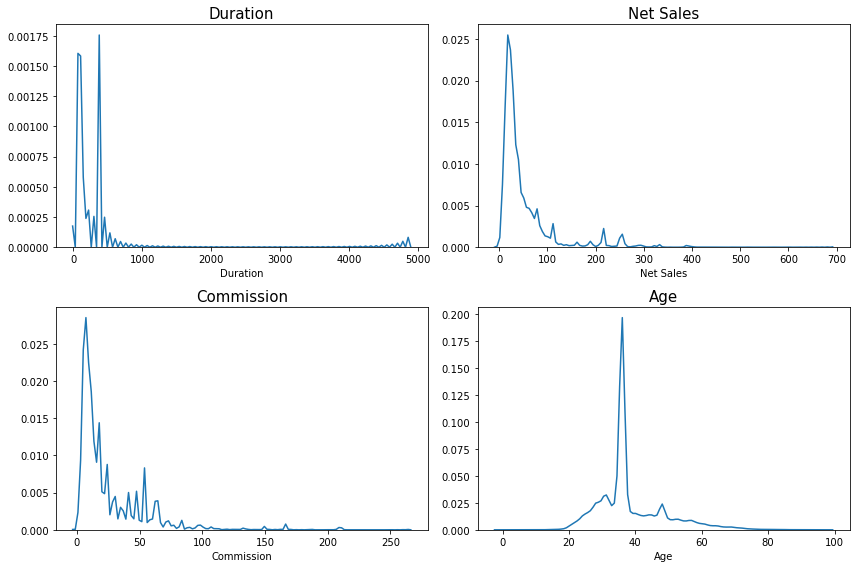

In [98]:
nrows = 2
ncols = 2
count = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(12,8), squeeze = False)
for i in range(nrows):
    for j in range(ncols):
        sns.distplot(train[num_col[count]], ax=ax[i][j], hist=False)
        plt.tight_layout()
        ax[i][j].set_title(num_col[count], fontsize=15)
        count +=1
    

Columns Duration, Net Sales and Commission are completely right skewed.

We will look at log transformation for all the numeric variables

In [99]:
# Log Transformation of Numeric Variables

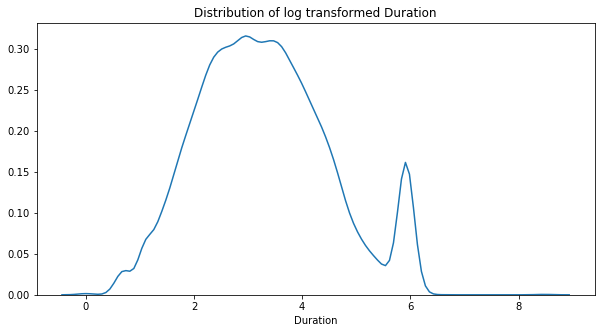

In [100]:
train['Duration'] = np.log(train['Duration']+1)
plt.figure(figsize=(10,5))
plt.title('Distribution of log transformed Duration')
sns.distplot(train['Duration'], hist=False)

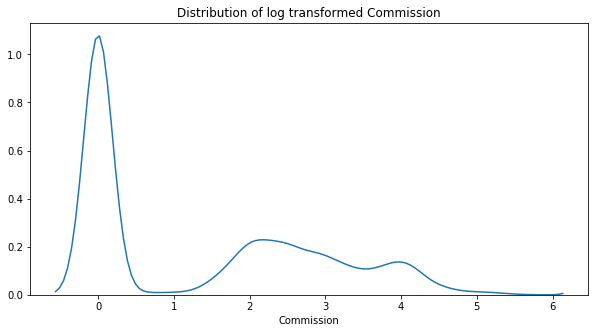

In [101]:
train['Commission'] = np.log(train['Commission']+1)
plt.figure(figsize=(10,5))
plt.title('Distribution of log transformed Commission')
sns.distplot(train['Commission'], hist=False)

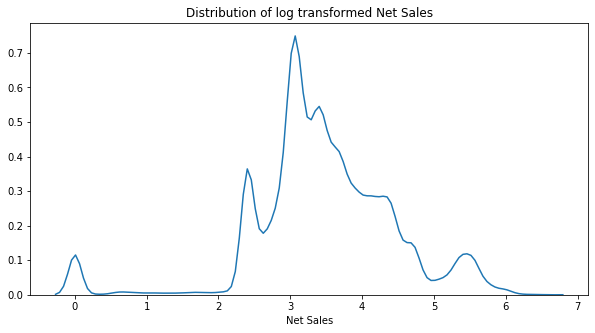

In [102]:
train['Net Sales'] = np.log(train['Net Sales']+1)
plt.figure(figsize=(10,5))
plt.title('Distribution of log transformed Net Sales')
sns.distplot(train['Net Sales'], hist=False)

The transformed variables are still not perfectly normal. For now, we will go ahead with the log transformation

# Predictions 

In [103]:
train.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim,Singapore,Cancellation Plan,2 way Comprehensive Plan,EPX
0,7,1,1,10,4.127134,30,2.564949,0.000000,41,0,0,1,0,1
1,7,1,1,10,1.609438,22,2.890372,0.000000,35,0,0,1,0,1
2,6,1,1,16,3.295837,38,3.034953,2.555676,47,0,0,0,0,0
3,7,1,1,1,2.772589,12,3.332205,0.000000,48,0,0,0,1,1
4,7,1,1,1,2.772589,22,3.637586,0.000000,36,0,0,0,1,1


Split the Data into Test and Train

In [104]:
train['Claim'] = train['Claim'].astype('category')

In [105]:
X = train[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Net Sales','Commission','Age','Singapore','Cancellation Plan','2 way Comprehensive Plan','EPX']]
y = train['Claim']
print(X.head(2))
print(y.head(2))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

   Agency  Agency Type  Distribution Channel  Product Name  Duration  \
0       7            1                     1            10  4.127134   
1       7            1                     1            10  1.609438   

   Destination  Net Sales  Commission  Age Singapore Cancellation Plan  \
0           30   2.564949         0.0   41         0                 1   
1           22   2.890372         0.0   35         0                 1   

  2 way Comprehensive Plan EPX  
0                        0   1  
1                        0   1  
0    0
1    0
Name: Claim, dtype: category
Categories (2, int64): [0, 1]


In [106]:
X.shape

(51079, 13)

In [107]:
y.shape

(51079,)

# Model 1: Base Random Forest Model

In [108]:
## Base Random Forest Model
rf_basemodel = RandomForestClassifier(random_state=0)
rf_basemodel.fit(X_train, y_train)
score_bm = rf_basemodel.score(X_test, y_test)
pred_bm = rf_basemodel.predict(X_test)

In [109]:
print('The accuracy score is', accuracy_score(y_test, pred_bm))

The accuracy score is 0.9402244844688071


In [110]:
# Probabilities for each class
probs_bm = rf_basemodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value_bm = roc_auc_score(y_test, probs_bm)
print('The ROC value is', roc_value_bm)

The ROC value is 0.96978925808564


In [111]:
# Extract feature importances
feature_imp = pd.DataFrame(rf_basemodel.feature_importances_, index= X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print('Features in descending order of Importance')
print(feature_imp)

Features in descending order of Importance
                          importance
Net Sales                   0.242379
Duration                    0.218516
Age                         0.147848
Commission                  0.142496
Agency                      0.095665
Destination                 0.076764
Product Name                0.027970
Agency Type                 0.026369
EPX                         0.009702
Cancellation Plan           0.005934
2 way Comprehensive Plan    0.005273
Distribution Channel        0.001084
Singapore                   0.000000


In [112]:
#Confusion Matrix and Classification Report
print('Confusion Matrix for Base Random Forest Model')
print(confusion_matrix(y_test, pred_bm))
print('')
print('')
print('Classification Report for Base Random Forest Model')
print(classification_report(y_test,pred_bm))

Confusion Matrix for Base Random Forest Model
[[12414   401]
 [  515  1994]]


Classification Report for Base Random Forest Model
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     12815
           1       0.83      0.79      0.81      2509

    accuracy                           0.94     15324
   macro avg       0.90      0.88      0.89     15324
weighted avg       0.94      0.94      0.94     15324



Observations:
    1. The base model has given a very high accuracy, precision value and ROC
    2. Features of Sales and Commissions rank highest in feature importance matrix
    3. However,from a business perspective, these features do not play any role in claims.
    4. Whether a person makes a travel insurance claim is contingent on his destination, duration, age and other factors.
    5. Sales and commissionsare metrics important for the insurer from a P/L perspective.
    5. We will thus look at models without considering the variables of Sales and Commissions

# Model 2: Base Random Forest Model without Sales and Commissions

In [113]:
X = train[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Age','Singapore','Cancellation Plan','2 way Comprehensive Plan',"EPX"]]
y = train['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [114]:
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(X_train, y_train)
rf2y_pred = rf2.predict(X_test)
print('The accuracy score is', accuracy_score(y_test, rf2y_pred))

The accuracy score is 0.8772513703993735


In [115]:
# Lets calculate the Area Under the Curve(ROC-AUC)
probs_rf2 = rf2.predict_proba(X_test)[:,1]
roc_value_rf2 = roc_auc_score(y_test, probs_rf2)
print('The ROC-AUC value is', roc_value_rf2)

The ROC-AUC value is 0.900464406948874


In [116]:
# Extract Feature Importance
feature_imp = pd.DataFrame(rf2.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print('Features in descending order of importance')
print(feature_imp)

Features in descending order of importance
                          importance
Duration                    0.398796
Age                         0.246060
Agency                      0.128737
Destination                 0.117292
Product Name                0.040760
Agency Type                 0.029912
EPX                         0.022917
Cancellation Plan           0.008883
2 way Comprehensive Plan    0.005173
Distribution Channel        0.001469
Singapore                   0.000000


In [117]:
# Confusion Matrix and Classification Report
print('Confusion Matrix for Base Random Forest Model without Sales and Commission')
print(confusion_matrix(y_test, rf2y_pred))
print('Classification Report for Base Random Forest Model without Sales and Commission')
print(classification_report(y_test, rf2y_pred))

Confusion Matrix for Base Random Forest Model without Sales and Commission
[[11935   880]
 [ 1001  1508]]
Classification Report for Base Random Forest Model without Sales and Commission
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12815
           1       0.63      0.60      0.62      2509

    accuracy                           0.88     15324
   macro avg       0.78      0.77      0.77     15324
weighted avg       0.87      0.88      0.88     15324



Lets create the RF model using only the top 5 features based on the Importance wrt Model 2

# Model 3: Model 2 with top five important features

In [118]:
X = train[['Agency','Product Name','Duration','Destination','Age']]
y = train['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [119]:
rf3 = RandomForestClassifier(random_state=0)
rf3.fit(X_train, y_train)
rf3y_pred = rf3.predict(X_test)
print('The accuracy score is', accuracy_score(y_test, rf3y_pred))

The accuracy score is 0.8771208561733229


In [120]:
# Lets calculate the Area Under the Curve(ROC-AUC)
probs_rf3 = rf3.predict_proba(X_test)[:,1]
roc_value_rf3 = roc_auc_score(y_test, probs_rf3)
print('The ROC-AUC value is', roc_value_rf3)

The ROC-AUC value is 0.8998787198702695


In [121]:
# Extract Feature Importance
feature_imp = pd.DataFrame(rf3.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print('Features in descending order of importance')
print(feature_imp)

Features in descending order of importance
              importance
Duration        0.407131
Age             0.255834
Agency          0.165163
Destination     0.115687
Product Name    0.056184


In [122]:
print('Confusion Matrix for Base Random Forest Model without Sales and Commission')
print(confusion_matrix(y_test, rf3y_pred))
print('Classification Report for Base Random Forest Model without Sales and Commission')
print(classification_report(y_test, rf3y_pred))

Confusion Matrix for Base Random Forest Model without Sales and Commission
[[11930   885]
 [  998  1511]]
Classification Report for Base Random Forest Model without Sales and Commission
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     12815
           1       0.63      0.60      0.62      2509

    accuracy                           0.88     15324
   macro avg       0.78      0.77      0.77     15324
weighted avg       0.87      0.88      0.88     15324



There is not much change in the prescion value for model 2 and model 3. We will now try HyperParameter Tuning

# Model 4 : Random Forest with Hyperparameter Tuning (Without Sales and Commissions)

In [123]:
# Random Forest Model with Randomized Search
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': [50,100,150,200,250],
               "min_samples_split": [3,4,5,6,7,8,9,10],
               "min_samples_leaf": [3,4,5,6,7,8,9,10],
               "criterion": ["gini", "entropy"]}

In [124]:
X = train[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Destination','Age','Singapore','Cancellation Plan','2 way Comprehensive Plan',"EPX"]]
y = train['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [125]:
rf4 = RandomForestClassifier(random_state = 0)
rf4_cv = RandomizedSearchCV(rf4, param_distributions = param_dist, n_iter=40, random_state=0, cv=5)

In [132]:
rf4_cv.fit(X_train, y_train)
print('Best Score: ', rf4_cv.best_score_)
print('Best Params: ', rf4_cv.best_params_)

Best Score:  0.8761292126975249
Best Params:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 3, 'criterion': 'entropy'}


In [133]:
score_rs = rf4_cv.score(X_test, y_test)
print('The accuracy score is', score_rs)

The accuracy score is 0.880187940485513


Run the RF model with the best parameters

In [126]:
rf_clf4 = RandomForestClassifier(n_estimators=200,random_state=0, min_samples_leaf=3 ,min_samples_split=5, criterion='entropy')

rf_clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
#Scoring the model on train data
score_rf4_train = rf_clf4.score(X_train, y_train)
print("Training score: %.2f " % score_rf4_train)

Training score: 0.92 


In [128]:
#Scoring the model on test_data
score_rf4_test = rf_clf4.score(X_test, y_test)
print("Testing score: %.2f " % score_rf4_test)

Testing score: 0.88 


In [129]:
# Actual class predictions
rf4_predictions = rf_clf4.predict(X_test)
print('The accuracy score is', accuracy_score(y_test, rf4_predictions))

The accuracy score is 0.880187940485513


In [130]:
# Probabilities for each class
rf4_probs = rf_clf4.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf4_probs)
print('The ROC-AUC value is',roc_value)

The ROC-AUC value is 0.9162165948974639


In [131]:
# Extract feature importances
feature_imp = pd.DataFrame(rf_clf4.feature_importances_, index= X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print('The most important features are')
print(feature_imp)

The most important features are
                          importance
Duration                    0.304336
Age                         0.181418
Agency                      0.168651
Destination                 0.167167
Product Name                0.053724
Agency Type                 0.047915
EPX                         0.034076
Cancellation Plan           0.029648
2 way Comprehensive Plan    0.010635
Distribution Channel        0.002430
Singapore                   0.000000


In [132]:
#Confusion Matrix and Classification Report
print('The Confusion Matrix is')
print(confusion_matrix(y_test, rf4_predictions))
print('')
print('')
print('The Classsification Report is')
print(classification_report(y_test,rf4_predictions))

The Confusion Matrix is
[[12170   645]
 [ 1191  1318]]


The Classsification Report is
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12815
           1       0.67      0.53      0.59      2509

    accuracy                           0.88     15324
   macro avg       0.79      0.74      0.76     15324
weighted avg       0.87      0.88      0.87     15324



Precision has increased from 0.64 to 0.67 after doing hyperparameter tuning the Random Forest Model.

# Model 6: Gradient Boosting Base Model

In [133]:
gb_clf = GradientBoostingClassifier(random_state=0,learning_rate=0.1)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [134]:
gb_pred = gb_clf.predict(X_test)
gb_score = accuracy_score(y_test, gb_pred)
print('The accuracy of the Gradient Boosting Classifier is', gb_score)

The accuracy of the Gradient Boosting Classifier is 0.8542156095014356


In [135]:
# Probabilities for each class
gb_probs = gb_clf.predict_proba(X_test)[:, 1]

# Calculate roc auc

roc_value_gb = roc_auc_score(y_test, gb_probs)
print('The ROC-AUC value is',roc_value_gb)

The ROC-AUC value is 0.8641038962816188


In [136]:
print('The Confusion matrix is') 
print(confusion_matrix(y_test, gb_pred))
print('')
print('')
print('The Classification Report is')
print(classification_report(y_test, gb_pred))

The Confusion matrix is
[[12152   663]
 [ 1571   938]]


The Classification Report is
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12815
           1       0.59      0.37      0.46      2509

    accuracy                           0.85     15324
   macro avg       0.74      0.66      0.69     15324
weighted avg       0.84      0.85      0.84     15324



As we can see, the precision value os only 0.59 with base Gradient Boosting Model as compared to 0.63 with the base Random Forest Model

# Model 7 : Gradient Boosting Model with HyperParameter Tuning

In [137]:
param_dist = { 'learning_rate':[0.01,0.05,0.1],
               'n_estimators': [100,200,250,300,350,400,450,500,600,700],
               'max_depth':[3,4,5,6,7]
             }

In [153]:
gb = GradientBoostingClassifier(random_state = 0)
gb_cv = RandomizedSearchCV(gb, param_distributions = param_dist, n_iter=40, random_state=0, cv=5)
gb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [154]:
print('Best Score: ', gb_cv.best_score_)
print('Best Params: ', gb_cv.best_params_)
score_gb = gb_cv.score(X_test, y_test)
print(score_gb)

Best Score:  0.8735561459935672
Best Params:  {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.05}
0.8775776559645001


Use the Gradient Boosting Classifier with the best parameters

In [138]:
gb1_clf = GradientBoostingClassifier(n_estimators=500, random_state=0, max_depth =7 ,learning_rate=0.05)
gb1_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
#Scoring the model on train data
score_gb1_clf = gb1_clf.score(X_train, y_train)
print("Training score: %.2f " % score_gb1_clf)

Training score: 0.92 


In [140]:
#Scoring the model on test_data
score_gb1_test = gb_clf.score(X_test, y_test)
print("Testing score: %.2f " % score_gb1_test)

Testing score: 0.85 


In [141]:
# Actual class predictions
gb1_predictions = gb1_clf.predict(X_test)
print('The accuracy score is', accuracy_score(y_test, gb1_predictions))

The accuracy score is 0.8775776559645001


In [142]:
# Probabilities for each class
gb1_probs = gb1_clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
gb1_roc_value = roc_auc_score(y_test, gb1_probs)
print('The ROC-AUC value is',gb1_roc_value)

The ROC-AUC value is 0.9153902758497034


In [143]:
# Extract feature importances
feature_imp = pd.DataFrame(gb1_clf.feature_importances_, index= X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_imp)

                          importance
Agency                      0.390558
Duration                    0.246922
Age                         0.151042
Destination                 0.104522
Product Name                0.061279
Cancellation Plan           0.017655
2 way Comprehensive Plan    0.016299
Agency Type                 0.007514
EPX                         0.002285
Distribution Channel        0.001924
Singapore                   0.000000


In [144]:
#Confusion Matrix and Classification Report
print('The confustion matrix')
print(confusion_matrix(y_test, gb1_predictions))
print('The classification report')
print(classification_report(y_test,gb1_predictions))

The confustion matrix
[[12098   717]
 [ 1159  1350]]
The classification report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     12815
           1       0.65      0.54      0.59      2509

    accuracy                           0.88     15324
   macro avg       0.78      0.74      0.76     15324
weighted avg       0.87      0.88      0.87     15324



There is improvement in the precision score of about 0.5 units by tuning hyperparameter

So far the highest precision score has been of the Random Forest  Model with hyperparamters tuned. 

We will try one last model. Stacking model combining the best params of Random Forest and Gradient Boosting

# Model 8 : Stacking Classifier combining Random Forest and Gradient Boosting 

In [145]:
from mlxtend.classifier import StackingClassifier

In [146]:
from sklearn.linear_model import LogisticRegression
classifier1 = RandomForestClassifier(n_estimators=200,random_state=0, min_samples_leaf=3 ,min_samples_split=5, criterion='entropy')
classifier2 = GradientBoostingClassifier(n_estimators=500, random_state=0, max_depth =7 ,learning_rate=0.05)

classifier_list=[classifier1,classifier2]

m_classifier=LogisticRegression(random_state=0)

# Code starts here
sclf = StackingClassifier(classifiers = classifier_list, meta_classifier = m_classifier)
sclf.fit(X_train, y_train)
s_score = sclf.score(X_test, y_test)
print(s_score)

0.8799269120334117


In [147]:
# Scoring the model on train data
score_gb_clf = sclf.score(X_train, y_train)
print("Training score: %.2f " % score_gb_clf)

Training score: 0.91 


In [148]:
#Scoring the model on test_data
score_gb_test = sclf.score(X_test, y_test)
print("Testing score: %.2f " % score_gb_test)

Testing score: 0.88 


In [149]:
# Test Accuracy and Actual class predictions
gb_predictions = sclf.predict(X_test)
print('The accuracy score is', accuracy_score(y_test, gb_predictions))

The accuracy score is 0.8799269120334117


In [150]:
# Probabilities for each class
gb_probs = sclf.predict_proba(X_test)[:, 1]

# Calculate roc auc
gb_roc_value = roc_auc_score(y_test, gb_probs)
print('The ROC-AUC value is',gb_roc_value)

The ROC-AUC value is 0.7686580670102652


In [151]:
#Confusion Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_test, gb_predictions))
print('')
print('')
print('Classification Report')
print(classification_report(y_test,gb_predictions))

Confusion Matrix
[[12312   503]
 [ 1337  1172]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     12815
           1       0.70      0.47      0.56      2509

    accuracy                           0.88     15324
   macro avg       0.80      0.71      0.75     15324
weighted avg       0.87      0.88      0.87     15324



# We will use the Stacked Model of Random Forest Classifier with hyperparameter tuning and Gradient Boosting with hyper parameter tuning as the final model

# Additional Things that could be explored
1. Binning Age into more segments
2. Feature Engineering
3. Using algorithms of XGBoost, SVM 